<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Stuff" data-toc-modified-id="Import-Stuff-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Stuff</a></span></li><li><span><a href="#Load-Appropriate-Dataframes" data-toc-modified-id="Load-Appropriate-Dataframes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Appropriate Dataframes</a></span></li><li><span><a href="#Function" data-toc-modified-id="Function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Function</a></span><ul class="toc-item"><li><span><a href="#Anonymous" data-toc-modified-id="Anonymous-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Anonymous</a></span></li><li><span><a href="#Named" data-toc-modified-id="Named-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Named</a></span></li></ul></li><li><span><a href="#Differences" data-toc-modified-id="Differences-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Differences</a></span><ul class="toc-item"><li><span><a href="#Vacuum-----Beryl" data-toc-modified-id="Vacuum-----Beryl-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Vacuum --- Beryl</a></span></li><li><span><a href="#Beryl-----Vacuum_Beryl" data-toc-modified-id="Beryl-----Vacuum_Beryl-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Beryl --- Vacuum_Beryl</a></span></li><li><span><a href="#Vacuum-----Vacuum_Beryl" data-toc-modified-id="Vacuum-----Vacuum_Beryl-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Vacuum --- Vacuum_Beryl</a></span></li></ul></li></ul></div>

# Import Stuff

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
pd.options.mode.chained_assignment = None # Suppresses annoying warning

sns.set(font_scale=1.5)
sns.set_context("poster")

# Load Appropriate Dataframes

In [44]:
with open('tidy_data/df_fine_sweep.pkl','rb') as fin:
    df_fine_sweep = pkl.load(fin)
with open('tidy_data/df_vacuum_beryl.pkl','rb') as fin:
    df_vacuum_beryl = pkl.load(fin)
with open('tidy_data/df_vacuum.pkl','rb') as fin:
    df_vacuum = pkl.load(fin)
    df_vacuum = df_vacuum[df_vacuum.coupling == 'antiferro'] # only want antiferro here
    
df_vacuum.head()

,config,coupling,energy,fill
0,0,antiferro,-14.224739,1000
1,1,antiferro,-14.224739,1000
2,10,antiferro,-14.224742,1000
3,11,antiferro,-14.224749,1000
4,12,antiferro,-14.224757,1000


# Function

## Anonymous

In [27]:
filter_by_fill = lambda fill, df: df[df.fill == fill].sort_values("config")
filter_by_coupling = lambda couple, df: df[df.coupling == couple]
get_energy_differences = lambda df1, df2: df1.energy.values-df2.energy.values

## Named

In [57]:
def zero_energy(df,couple="antiferro"):
    #df = filter_by_couple(couple,filter_by_fill(fill))
    #df.sort_values("config",axis=0,inplace=True)
    zero_en = df.energy.values[0]
    df.energy -= zero_en
    scale = len(df.config)-1
    df.config *= 0.01
    
    return df

def take_difference(df1,df2,fill):
    df1_fill = zero_energy(filter_by_fill(fill,df1))
    df2_fill = zero_energy(filter_by_fill(fill,df2))
    
    df_diff = df1_fill.copy()
    df_diff['energy'] = get_energy_differences(df1_fill,df2_fill)
    
    return df_diff

def plot_differences(df1,df2):
    fig = plt.figure(figsize=(12,8))
    ax = plt.gca()

    fills = set(df1.fill.values)
    for fill in fills:
        df = take_difference(df1,df2,fill)
        sns.lineplot(x='config',y='energy',ax=ax,
                     data=df,label='Fill {}'.format(fill))
    
    
    

# Differences

## Vacuum --- Beryl

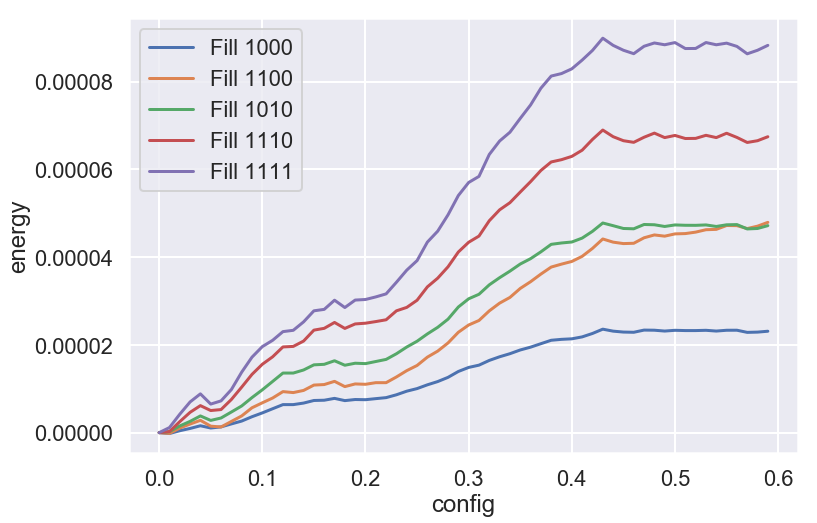

In [58]:
plot_differences(df_fine_sweep,df_vacuum)

## Beryl --- Vacuum_Beryl

This map represents the crystal contribution to the total potential map

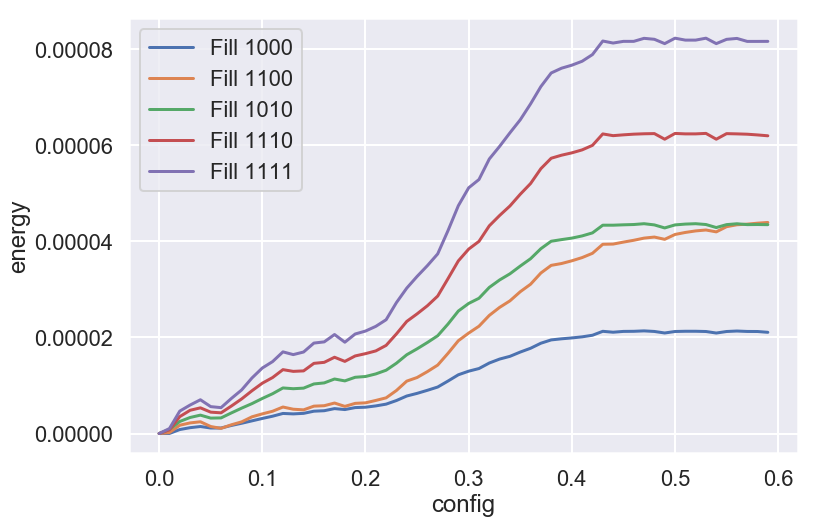

In [60]:
plot_differences(df_fine_sweep,df_vacuum_beryl)

## Vacuum --- Vacuum_Beryl

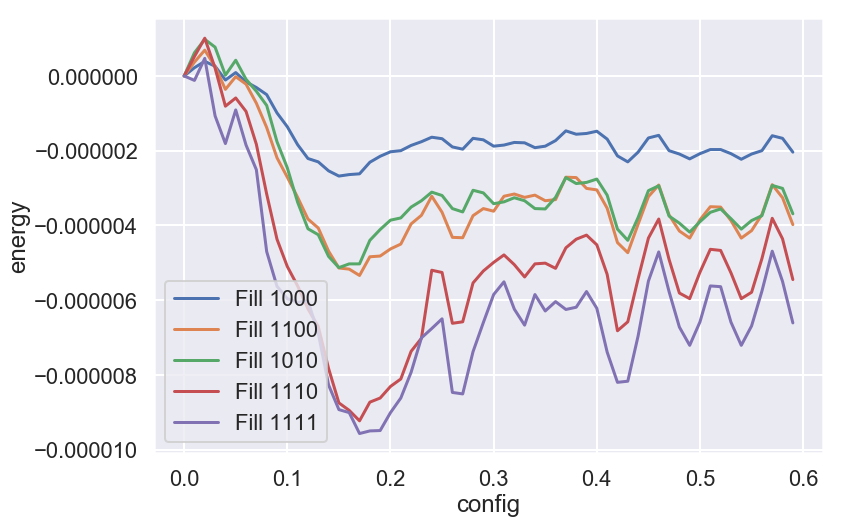

In [61]:
plot_differences(df_vacuum,df_vacuum_beryl)